# Work for Project: Roshan Ravichandran

In [1]:
import math
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from typing import Dict
import csv
from typing import NamedTuple
from scipy.spatial import distance
from collections import defaultdict
Vector = List[float]

In [2]:
original = pd.read_csv("vehicles.csv", engine = "python", encoding = "latin1")
usedcars = original[["price", "year", "manufacturer", "condition", "cylinders", "odometer", "title_status", "transmission"]]

## A scatterplot between the inputs and the resulting price

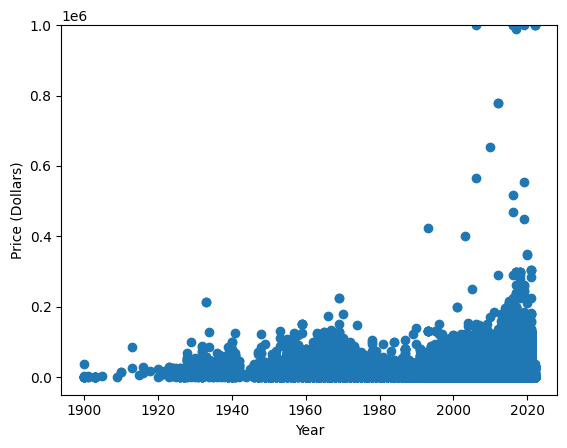

In [9]:
#Setting up a scatter plot between the year and the price
fig, ax = plt.subplots()
year = usedcars["year"]
price = usedcars["price"]

#plotting the line
ax.scatter(year, price)
"""
# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
noNaN = np.isfinite(year) & np.isfinite(price)
m, b = np.polyfit(year[noNaN], price[noNaN], deg=1)
ax.plot(year, m * year + b, color="red")
"""
#labels
plt.xlabel("Year")
plt.ylabel("Price (Dollars)")

# setting the limits to make it easy to view
plt.ylim(-50000, 1000000)
#plt.xlim(1900, 2022)
plt.show()

#### Looking at this graph, there's a slightly positive relationship between the year and the price. In other words, the more recent a car enters the used car market, the higher its price is, ever so slightly

## Plotting the relationship between the mileage and the price

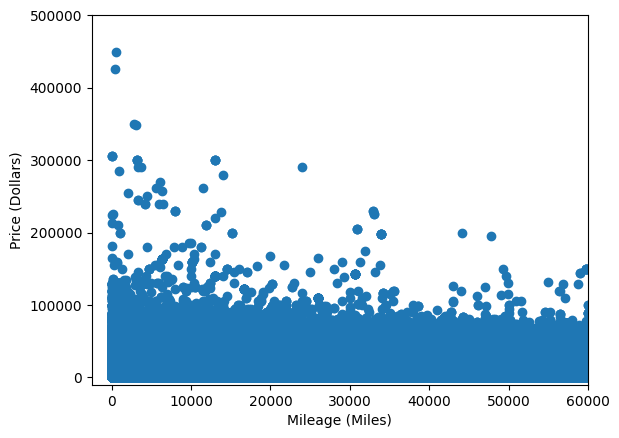

In [4]:
#Setting up a scatter plot between the mileage and the price
fig, ax = plt.subplots()
mileage = usedcars["odometer"]
price = usedcars["price"]

#plotting the line
ax.scatter(mileage, price)

# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
#noNaN = np.isfinite(mileage) & np.isfinite(price)
#m, b = np.polyfit(mileage[noNaN], price[noNaN], deg=1)
#ax.plot(mileage, m * mileage + b, color="red")

#labels
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (Dollars)")

# setting the limits to make it easy to view
plt.ylim(-10000, 500000)
plt.xlim(-2500, 60000)
plt.show()

#### Unlike the relationship between the year and the price, the relationship between the mileage of a car and its price is negative, meaning that the more a car has been driven, the lower its price becomes

## Heat Map of Correlations

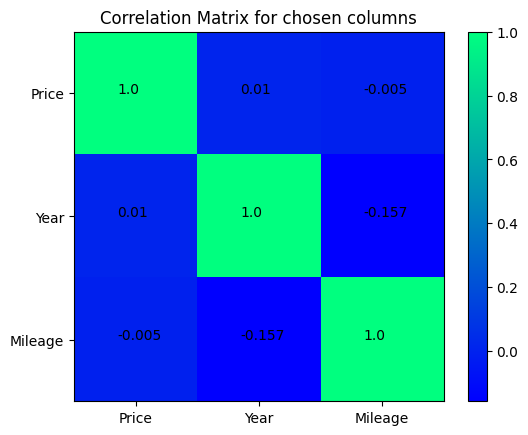

In [5]:
#Consider only values which are finite, aka have no NaN value
noNaN = np.isfinite(mileage) & np.isfinite(price) * np.isfinite(year)

correlations = usedcars[["price", "odometer", "year"]][noNaN].corr()
#Setting the axes up
ax = plt.axes()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["Price", "Year", "Mileage"])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(["Price", "Year", "Mileage"])

#Setting the title
plt.title("Correlation Matrix for chosen columns")
plt.imshow(correlations, cmap="winter")
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.annotate(str(round(correlations.values[i][j], 3)), xy=(j - 0.15, i))

# THIS LINE GRAPH IS COMPLETELY WRONG

               price    year       odometer
year                                       
1900.0  1.000000e+00  1900.0  100000.000000
1905.0  3.990000e+03  1905.0  202570.000000
1923.0  1.528111e+04  1923.0    5244.777778
1924.0  2.490000e+04  1924.0       1.000000
1925.0  1.250000e+04  1925.0     300.500000
...              ...     ...            ...
2018.0  2.633920e+04  2018.0   38427.482706
2019.0  3.261918e+04  2019.0   26454.087772
2020.0  3.438858e+04  2020.0   15365.172206
2021.0  6.513363e+06  2021.0    3598.159420
2022.0  4.533215e+04  2022.0  391919.777778

[100 rows x 3 columns]


(-5000.0, 400000.0)

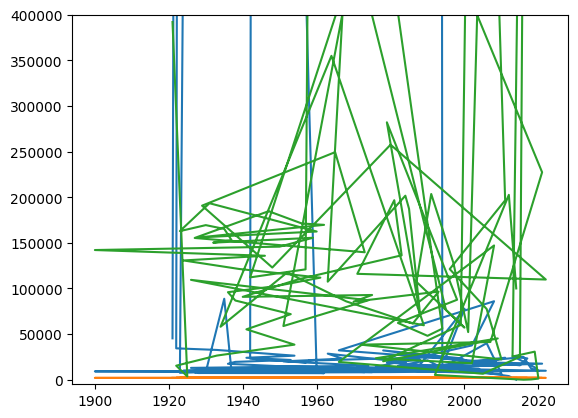

In [19]:
fig, ax = plt.subplots()
#remove NaN Values
noNaN = np.isfinite(mileage) & np.isfinite(price) * np.isfinite(year)
years = (year[noNaN][::5]).unique()
yearmeans = usedcars[::5].groupby(year[noNaN]).mean(numeric_only=True)
print(yearmeans)
ax.plot(years, yearmeans)
plt.ylim(-5000, 400000)

# Box Plot for price

Text(0.5, 1.0, 'Boxplot for the price of used cars')

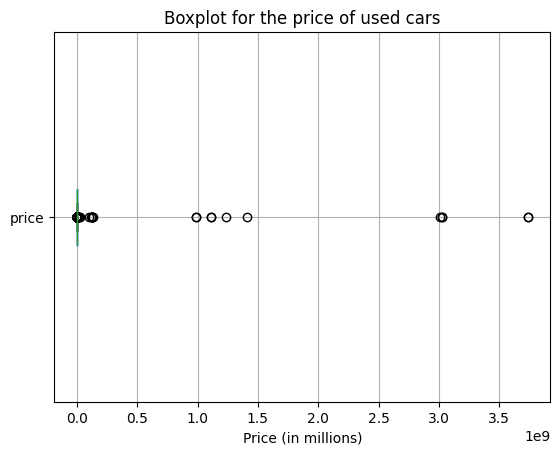

In [7]:
usedcars.boxplot(column=["price"], vert=False, xlabel="Price (in millions)")
plt.title("Boxplot for the price of used cars")

#### As shown by the boxplot, the vast majority of the data points are located among the lower end to the left, meaning the data is tremendously skewed right. Some outliers range from a minimum of about 100,000 dollars to a maximum of around 3.8 million. Seeing as how outliers have a large effect on the mean of the price of used cars, this could be problematic for trying to accurately predict the price of used cars with out inputs

(0.0, 50000.0)

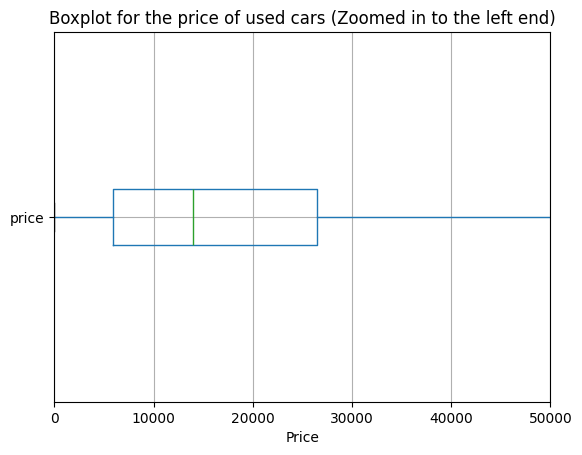

In [8]:
usedcars.boxplot(column=["price"], vert=False, xlabel="Price")
plt.title("Boxplot for the price of used cars (Zoomed in to the left end)")
plt.xlim(0, 50000)

#### Now with a zoomed in view of used car prices at the lower end, ignoring the outliers. The median price for a used car is around 14000 dollars, which is incredibly low compared to the median and maximum prices found at the right end of the boxplot, and shows how troublesome the skewness might be in trying to make our predictions